<a href="https://colab.research.google.com/github/SarahFLestari/Training-Building-Capability-DS/blob/main/Module_4_Take_home_Assignment_Sarah_FL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [24]:
import sys
import os
import gdown
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

random_state = 1234 # get reproducible trees


# Prepare Data

**Restartnet** is a telecommunication company that are market leader in in Wakanda since 1990 and the first to create high speed mobile internet that integrate satellite and ground cable.

In the last 5 years, there are more fierce competition with new competitor emerging. A lot of Restartnet customer is moving to that new competitor and Restartnet CEO is quite concern about that issue.

After digging some data, Restarnet CEO realize that their churn rate is high at 25%.



As a **CEO Analyst**, we initiate to find which customers are likely to churn by creating a **customer churn model** so that we can offer accurate engagement packages to the targeted customers.

After we provide the list of customer, we calculate the impact for the company.

With assumsions:

* For each customer churn, we lost $500.

* Engagement program cost is $100, and

* All customer that get will stay


The **data** is provided in this [link](https://drive.google.com/file/d/1jAFn03vk055D9gZrrzM70_cdPyUDg-bv/view) which consist of sample **unique customer** that have already bought internet package in Restartnet company from 2010 to 2020. The customer data consist of their demographic data and the summary of their transaction in Restartnet. The detail of the data definition can be seen below.

Data Definition:

| Field           | Description                                     |
|-----------------|-------------------------------------------------|
| customerID      | Customer's unique identifier                     |
| gender          | Whether the customer is a male or a female      |
| SeniorCitizen   | Whether the customer is a senior citizen or not |
| Partner         | Whether the customer has a partner or not       |
| Dependents      | Whether the customer has dependents or not      |
| tenure          | Number of months the customer has stayed        |
| PhoneService    | Whether the customer has a phone service or not |
| MultipleLines   | Whether the customer has multiple lines or not  |
| InternetService | Customer's internet service provider            |
| OnlineSecurity  | Whether the customer has online security or not |
| OnlineBackup    | Whether the customer has online backup or not   |
| DeviceProtection| Whether the customer has device protection or not |
| TechSupport     | Whether the customer has tech support or not    |
| StreamingTV     | Whether the customer has streaming TV or not    |
| StreamingMovies | Whether the customer has streaming movies or not|
| Contract        | The contract term of the customer               |
| PaperlessBilling| Whether the customer has paperless billing or not |
| PaymentMethod   | The customer's payment method                   |
| MonthlyCharges  | The amount charged to the customer monthly      |
| TotalCharges    | The total amount charged to the customer        |
| Churn           | Whether the customer churned or not              |



In [2]:
# Download Data
gdrive_url = "https://drive.google.com/file/d/1jAFn03vk055D9gZrrzM70_cdPyUDg-bv/view"
file_name = 'churn_data.csv'
gdown.download(gdrive_url, file_name, fuzzy=True)


Downloading...
From: https://drive.google.com/uc?id=1jAFn03vk055D9gZrrzM70_cdPyUDg-bv
To: /content/churn_data.csv
100%|██████████| 977k/977k [00:00<00:00, 53.9MB/s]


'churn_data.csv'

In [3]:
df = pd.read_csv('churn_data.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

features = numeric_features + categorical_features
target = 'Churn'

print("numeric_features : ", numeric_features)
print("categorical_features : ", categorical_features)
print("features: ", features)
print("target: ", target)
print("columns used: ", features + [target])


numeric_features :  ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features :  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
features:  ['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
target:  Churn
columns used:  ['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df = df[ features + [target] ]


In [8]:
# Handle missing value on TotalCharges with value 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Handle Categorical Data
## we transform categorical into several column as it will treated differently
df = pd.get_dummies(df, columns = categorical_features)


In [9]:
# transform target to 1 if Yes, 0 if No
df[target] = (df[target] == 'Yes').astype(int)

In [10]:
# Split data
## Asumming df_test data is new data
df_train, df_test = train_test_split(df, test_size=0.33, random_state=random_state)

In [11]:
df_train.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2632,55,64.75,3617.10,0,True,False,True,False,True,False,...,True,False,False,True,False,True,False,False,False,True
1210,17,69.00,1149.65,1,False,True,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
5018,72,19.70,1379.80,0,True,False,True,False,False,True,...,False,False,False,True,True,False,False,True,False,False
4891,4,65.60,250.10,0,False,True,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False
3794,8,54.75,445.85,0,False,True,True,False,False,True,...,False,True,False,False,False,True,False,False,False,True


In [12]:
df_train.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female',
       'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',

In [13]:
features = list(df_train.columns)
features.remove(target)

features

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Female',
 'gender_Male',
 'SeniorCitizen_0',
 'SeniorCitizen_1',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'P

# Evaluation metrics comparison from several models

## Train & Evaluate Decision Tree Classifier

with specs
```
max depth = 7
class weight = balanced
random state = 1234
```

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4718 entries, 2632 to 2863
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   4718 non-null   int64  
 1   MonthlyCharges                           4718 non-null   float64
 2   TotalCharges                             4718 non-null   float64
 3   Churn                                    4718 non-null   int64  
 4   gender_Female                            4718 non-null   bool   
 5   gender_Male                              4718 non-null   bool   
 6   SeniorCitizen_0                          4718 non-null   bool   
 7   SeniorCitizen_1                          4718 non-null   bool   
 8   Partner_No                               4718 non-null   bool   
 9   Partner_Yes                              4718 non-null   bool   
 10  Dependents_No                            4718 non-

In [15]:
# import model
from sklearn.tree import DecisionTreeClassifier

# initiate model
model_tree = DecisionTreeClassifier(max_depth=7, random_state=random_state, class_weight='balanced')

# Train model
model_tree.fit(df_train[features].values, df_train[target].values)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, random_state=1234)

In [29]:
# Evaluate Precision, Recall, and F1 using Test Data
prediction = model_tree.predict(df_test[features])
label = df_test[target].values

print("precision_score\t:" ,precision_score(label, prediction))
print("recall_score \t:" ,recall_score(label, prediction))
print("f1_score \t:" ,f1_score(label, prediction))

precision_score	: 0.46303901437371664
recall_score 	: 0.754180602006689
f1_score 	: 0.573791348600509


Confusion Matrix:
[[1204  523]
 [ 147  451]]


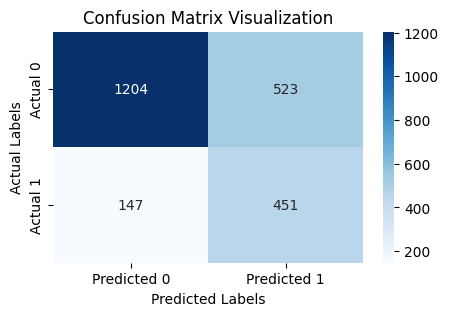

In [30]:
prediction_dt = prediction.copy()
# Compute the confusion matrix
cm_dt = confusion_matrix(label, prediction_dt)
print("Confusion Matrix:")
print(cm_dt)

# Visualization of the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

## Train & Evaluate Random Forest

with specs
```
n estimators = 10
max_depth = 3
random_state=random_state
class_weight = 'balanced'
```

In [26]:
# import model
from sklearn.ensemble import RandomForestClassifier

# initiate model
model_rf = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=random_state, class_weight='balanced')

# Train model
model_rf.fit(df_train[features].values, df_train[target].values)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=10,
                       random_state=1234)

In [27]:
# Evaluate Precision, Recall, and F1 using Test Data

prediction_rf = model_rf.predict(df_test[features])
label = df_test[target].values

print("precision_score\t:" ,precision_score(label, prediction_rf))
print("recall_score \t:" ,recall_score(label, prediction_rf))
print("f1_score \t:" ,f1_score(label, prediction_rf))

precision_score	: 0.4733201581027668
recall_score 	: 0.8010033444816054
f1_score 	: 0.5950310559006211


Confusion Matrix:
[[1194  533]
 [ 119  479]]


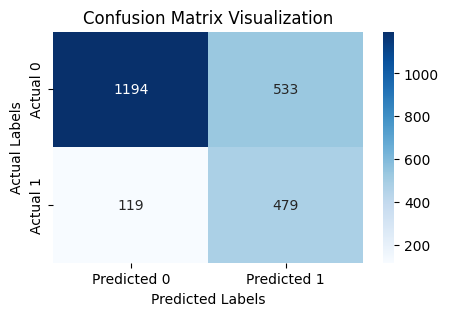

In [28]:
# Compute the confusion matrix
cm_rf = confusion_matrix(label, prediction_rf)
print("Confusion Matrix:")
print(cm_rf)

# Visualization of the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

## Train & Evaluate Your own model

Feel free to pick any classification model in https://scikit-learn.org/stable/supervised_learning.html

But you required to have higher f1_score more than `0.61`


In [ ]:
df_train[features]

### Random Forest

In [31]:
# import model
# from sklearn.ensemble import RandomForestClassifier

# initiate model
model_rf2 = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=random_state, class_weight='balanced')

# Train model
model_rf2.fit(df_train[features].values, df_train[target].values)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=10,
                       random_state=1234)

In [32]:
# Evaluate Precision, Recall, and F1 using Test Data

prediction_rf2 = model_rf2.predict(df_test[features])
label = df_test[target].values

print("precision_score\t:" ,precision_score(label, prediction_rf2))
print("recall_score \t:" ,recall_score(label, prediction_rf2))
print("f1_score \t:" ,f1_score(label, prediction_rf2))

precision_score	: 0.4931650893796004
recall_score 	: 0.7842809364548495
f1_score 	: 0.605551969012266


### XGBoost 1

In [33]:
from sklearn.preprocessing import RobustScaler
x_train = df_train[features].copy()
y_train = df_train[target].copy()
x_test = df_test[features].copy()
y_test = df_test[target].copy()
Scaler = RobustScaler()
Scaler.fit_transform(x_train)
Scaler.transform(x_test)

# import model
from xgboost import XGBClassifier

# initiate model
XGBC = XGBClassifier()

# Train model
XGBC.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
# Evaluate Precision, Recall, and F1 using Test Data
prediction_xgb = XGBC.predict(x_test)
label = y_test

print("precision_score\t:" ,precision_score(label, prediction_xgb))
print("recall_score \t:" ,recall_score(label, prediction_xgb))
print("f1_score \t:" ,f1_score(label, prediction_xgb))

precision_score	: 0.5711678832116789
recall_score 	: 0.5234113712374582
f1_score 	: 0.5462478184991274


#### Hyeperparameter Tunning XGBoost 1

In [35]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Define the hyperparameter distributions
param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)
}

# Create the XGBoost model object
xgb_model = XGBClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(x_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.04272905066586612, 'max_depth': 4, 'n_estimators': 92, 'subsample': 0.7084415441999936}
Best score:  0.8075428671567483


In [36]:
# initiate model
XGBC = XGBClassifier(learning_rate=0.09119847573437445, max_depth=3, n_estimators=62, subsample=0.871294633303206)

# Train model
XGBC.fit(x_train, y_train)

# Evaluate Precision, Recall, and F1 using Test Data
prediction_xgb = XGBC.predict(x_test)
label = y_test

print("precision_score\t:" ,precision_score(label, prediction_xgb))
print("recall_score \t:" ,recall_score(label, prediction_xgb))
print("f1_score \t:" ,f1_score(label, prediction_xgb))

precision_score	: 0.6331360946745562
recall_score 	: 0.5367892976588629
f1_score 	: 0.5809954751131221


### XGBoost 2

In [37]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score, make_scorer
from sklearn.datasets import make_classification

X_train = df_train[features].copy()
y_train = df_train[target].copy()
X_test = df_test[features].copy()
y_test = df_test[target].copy()

# Define the model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'scale_pos_weight': [sum(y_train == 0) / sum(y_train == 1)],  # Adjusting the weights for imbalance
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Define the scoring function
f1_scorer = make_scorer(f1_score)

# Setup the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=f1_scorer, cv=3, verbose=1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

# Evaluate model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test F1 Score:", f1_score(y_test, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 2.7120377655389456, 'subsample': 0.8}
Best F1 score: 0.646469503478906
Test F1 Score: 0.6198292843072882


In [38]:
# fit model no training data
model = XGBClassifier(scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),
                      max_depth=5,
                      learning_rate=0.01,
                      n_estimators=200,
                      subsample=0.8,
                      colsample_bytree=0.8)

model.fit(x_train, y_train)

# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("precision_score\t:" ,precision_score(y_test, predictions))
print("recall_score \t:" ,recall_score(y_test, predictions))
print("f1_score \t:" ,f1_score(y_test, predictions))

precision_score	: 0.5102702702702703
recall_score 	: 0.7892976588628763
f1_score 	: 0.6198292843072882


Confusion Matrix:
[[1274  453]
 [ 126  472]]


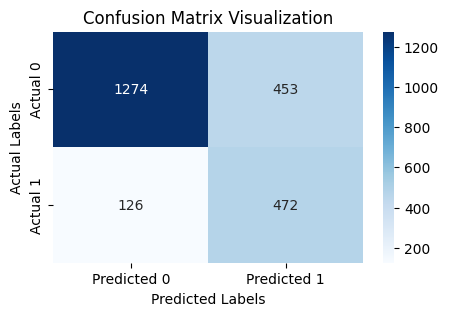

In [41]:
prediction_xgboost = np.array(predictions.copy())
prediction_xgboost.sum()

# Compute the confusion matrix
cm_xgboost = confusion_matrix(label, prediction_xgboost)
print("Confusion Matrix:")
print(cm_xgboost)

# Visualization of the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm_xgboost, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

# Business impact comparison from several models

[recall the assumption]

assumsions:

* For each customer churn, we lost $500.

* Engagement program cost is $100, and

* All customer that get engagement will stay

----
We want to compare the business impact on:
* Case 1: if no engagement program
* Case 2: if we send engagement program to all user
* Case 3: if we send engagement program based on above decision tree (`model_tree`)
* Case 4: if we send engagement program based on above random forest (`model_rf`)  
* Case 5: if we send engagement program based on above the best model (`model`)

----

First we calculate how many customer and churn customer in test dataset

In [42]:
total_customer = len(df_test)
real_churn = len(df_test.loc[df_test[target] == 1])

print("Total customer \t:", total_customer)
print("Total churn \t:", real_churn)

Total customer 	: 2325
Total churn 	: 598


Save the assumption into variable

In [43]:
churn_value_lost_per_customer = 500
engagement_cost_per_customer = 100

print("Churn Value Lost per customer\t:", churn_value_lost_per_customer)
print("Engagement Cost per customer\t:", engagement_cost_per_customer)

Churn Value Lost per customer	: 500
Engagement Cost per customer	: 100


## Case 1: if no engagement program

In [44]:
print("CASE 1: If no engagement program")

value_lost_case1 = real_churn * churn_value_lost_per_customer
engagement_cost_case1 = 0 # because no engagement
total_cost_case1 = value_lost_case1 + engagement_cost_case1
print("\t Value Lost \t: $", value_lost_case1)
print("\t Engagement cost: $", engagement_cost_case1)
print("\t Total cost \t: $",  total_cost_case1)


CASE 1: If no engagement program
	 Value Lost 	: $ 299000
	 Engagement cost: $ 0
	 Total cost 	: $ 299000


## Case 2: if we send engagement program to all user

In [45]:
print("Case 2: if we send engagement program to all user")

value_lost_case2 = 0 # because no customer lost
engagement_cost_case2 = total_customer * engagement_cost_per_customer
total_cost_case2 = value_lost_case2 + engagement_cost_case2
print("\t Value Lost \t: $", value_lost_case2)
print("\t Engagement cost: $", engagement_cost_case2)
print("\t Total cost \t: $",  total_cost_case2)


Case 2: if we send engagement program to all user
	 Value Lost 	: $ 0
	 Engagement cost: $ 232500
	 Total cost 	: $ 232500


Looks like if we send engagement program to all customer, it is more beneficial for the company (232500 < 299000)

But lets see how the model performs

## Case 3: if we send engagement program based on above decision tree (`model_tree`)

Tips, you need to find the number of
* how many customer that predicted as churn (`predict_churn`)
* how many customer that actually churn **but** we predict it as stay (`real_churn_predict_stay`)

Hint: you can use confussion matrix
```python
confusion_matrix(y_true_test, y_pred_test)
```
explore the indexing of `confusion_matrix` like using `[0,0]` to get the number inside confusion matrix
```python
confusion_matrix(y_true_test, y_pred_test)[0,0]
```

for reminder, this is the content of confusion matrix
![Confusion metrics](https://miro.medium.com/v2/resize:fit:974/1*H_XIN0mknyo0Maw4pKdQhw.png)

In [46]:
print("CASE 3:  if we send engagement program based on above decision tree (model_tree)")
predict_churn = prediction_dt.sum()  #predicted as churn. we send engagement
real_churn_predict_stay = cm_dt[1,0] #predicted as stay, but actually churn. they won't get engagement

value_lost_case3 = real_churn_predict_stay * churn_value_lost_per_customer #churn user don't get engagement
engagement_cost_case3 = predict_churn * engagement_cost_per_customer
total_cost_case3 = value_lost_case3 + engagement_cost_case3

print("\t Value Lost \t: $", value_lost_case3)
print("\t Engagement cost: $", engagement_cost_case3)
print("\t Total cost \t: $",  total_cost_case3)


CASE 3:  if we send engagement program based on above decision tree (model_tree)
	 Value Lost 	: $ 73500
	 Engagement cost: $ 97400
	 Total cost 	: $ 170900


## Case 4: if we send engagement program based on above random forest (`model_rf`)  

In [48]:
print("Case 4: if we send engagement program based on above random forest (model_rf) ")

predict_churn = prediction_rf.sum()  #predicted as churn. we send engagement
real_churn_predict_stay = cm_rf[1,0] #predicted as stay, but actually churn. they won't get engagement

value_lost_case4 = real_churn_predict_stay * churn_value_lost_per_customer #churn user don't get engagement
engagement_cost_case4 = predict_churn * engagement_cost_per_customer
total_cost_case4 = value_lost_case4 + engagement_cost_case4

print("\t Value Lost \t: $", value_lost_case4)
print("\t Engagement cost: $", engagement_cost_case4)
print("\t Total cost \t: $",  total_cost_case4)


Case 4: if we send engagement program based on above random forest (model_rf) 
	 Value Lost 	: $ 59500
	 Engagement cost: $ 101200
	 Total cost 	: $ 160700


## Case 5: if we send engagement program based on above the best model (model)

In [49]:
print("Case 5: if we send engagement program based on above the best model (model)")

predict_churn = prediction_xgboost.sum() #predicted as churn. we send engagement
real_churn_predict_stay = cm_xgboost[1,0] #predicted as stay, but actually churn. they won't get engagement

value_lost_case5 = real_churn_predict_stay * churn_value_lost_per_customer #churn user don't get engagement
engagement_cost_case5 = predict_churn * engagement_cost_per_customer
total_cost_case5 = value_lost_case5 + engagement_cost_case5

print("\t Value Lost \t: $", value_lost_case5)
print("\t Engagement cost: $", engagement_cost_case5)
print("\t Total cost \t: $",  total_cost_case5)


Case 5: if we send engagement program based on above the best model (model)
	 Value Lost 	: $ 63000
	 Engagement cost: $ 92500
	 Total cost 	: $ 155500


It's more beneficial to send engagement program based on the best model (XGBOOST). Because the cost is only $155500:
*   The cost is 47.9% lower than Case 1
*   The cost is 33% lower than Case 2

Based on the calculation above, we can save the cost from $299000 to $155500 or (47.9%) by using the best model (XGBOOST) compared with if we do not take action at all